In [1]:
VERSION

v"1.0.1"

# 1. Scalars, Vectors, Matrices and Tensors

Scalars

$s \in R$

A scalar can be thought of as a matrix with only a single entry. From this, we can see that a scalar is its own transpose: $a = a^\top$

Vectors: a vector is an array of numbers

x<sub>z</sub>

In [13]:
Z = rand(1, 5)

1×5 Array{Float64,2}:
 0.00268182  0.681545  0.677991  0.833725  0.0486773

Matrices - a 2D array of numbers

In [10]:
M = [(i+j)%2 for i=1:8, j=1:8]

8×8 Array{Int64,2}:
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0

In [2]:
# matrices
z = [1 2 3; 4 1 6; 7 8 1]

3×3 Array{Int64,2}:
 1  2  3
 4  1  6
 7  8  1

In [3]:
# transpose
transpose(z)

3×3 LinearAlgebra.Transpose{Int64,Array{Int64,2}}:
 1  4  7
 2  1  8
 3  6  1

## Tensors
An array with more than two axes, in this case 3 axes or dimensions.

Repmat was deprecated and replaced with repeat.  
https://github.com/JuliaLang/julia/pull/26039

In [4]:
T = rand(0:10, (3,4,3))

3×4×3 Array{Int64,3}:
[:, :, 1] =
 7  1  1  3
 0  0  0  4
 3  6  9  0

[:, :, 2] =
 10  2  4  10
  6  1  3   5
  1  6  6   3

[:, :, 3] =
  9  4  7  8
 10  8  6  9
  5  5  5  4

In [ ]:
k = repeat([0 1 3;1 0 3],4,3,2)

## Tensor transpose

The transpose of a matrix is the mirror image of the matrix across a diagonal line, called the main diagonal, running down and to the right, starting from its upper left corner. See figure 2.1 for a graphical depiction of this operation. We denote the transpose of a matrix A as $\mathbf{A}^\top$
, and it is defined such that


(A$x^\top$)<sub>i,j</sub> = A<sub>j,i</sub>

In [11]:
using LinearAlgebra
Mt = transpose(M)

8×8 Transpose{Int64,Array{Int64,2}}:
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0

# 2.2 Multiplying Matrices and Vectors
## Matrix products aka element-wise products aka Hadamard products

The matrix product of matrices A and B is a third matrix C. In order for this product to be defined, A must have the same number of columns as B has rows. If A is of shape m × n and B is of shape n × p, then C is of shape m × p. We can write the matrix product just by placing two or more matrices together, e.g.
C = AB.

In [6]:
# matrix product
A = rand(3, 3)
B = rand(3, 4)
C = A * B

3×4 Array{Float64,2}:
 0.662875  0.702962  0.842964  0.852696
 0.680633  0.728782  0.76477   0.688399
 0.729058  0.863334  0.929137  0.80684 

# 3. Identity and Inverse Matrices

In [62]:
M = [2 5; 1 3]

2×2 Array{Int64,2}:
 2  5
 1  3

In [63]:
N = inv(M)

2×2 Array{Float64,2}:
  3.0  -5.0
 -1.0   2.0

In [68]:
M*N == N*M == Matrix(I, 2, 2)

true

# 4. Linear Dependence and Span

# 5. Norms

Sometimes we need to measure the size of a vector. In machine learning, we usually
measure the size of vectors using a function called a norm .

In [14]:
using LinearAlgebra

In [15]:
norm(A, 2) # euclidean norm

1.9787693535421

In [16]:
norm(A, 1) # L1 norm, discriminate between elements that are exactly zero and elements that are small but nonzero

5.39072190165707

In [17]:
norm(A, Inf)# max norm, the maximum row sum of A

0.8577576083963998

In [12]:
# Frobenius norm

# 6. Special Kinds of Matrices and Vectors

In [36]:
# diagonal matrix
v = [1,2]
diagA = Diagonal(v)

2×2 Diagonal{Int64,Array{Int64,1}}:
 1  ⋅
 ⋅  2

In [37]:
x = [3,4]
dot(v, x)

11

In [42]:
inv(diagA)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   0.5

In [75]:
# symetric matrix
A = [2 -3; -3 5]
A == transpose(A)

true

In [87]:
# orthonomal matrix
A = [0 -0.8 -0.6; 0.8 -0.36 0.48; 0.6 0.48 -0.64]
A*transpose(A) == transpose(A)*A #?== Matrix(I,3,3)

true

In [86]:
inv(A) == transpose(A)

true

# 7. Eigendecomposition

In [113]:
A = SymTridiagonal([1.; 2.; 1.], [2.; 3.])

3×3 SymTridiagonal{Float64,Array{Float64,1}}:
 1.0  2.0   ⋅ 
 2.0  2.0  3.0
  ⋅   3.0  1.0

In [89]:
# eigenvector 
v = eigvecs(A)

3-element Array{Float64,1}:
 -2.1400549446402604
  1.0000000000000002
  5.140054944640259 

In [96]:
# eigendecomposition
F = eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 -2.1400549446402506
  1.0000000000000027
  5.1400549446402595
eigenvectors:
3×3 Array{Float64,2}:
  0.418304  -0.83205      0.364299
 -0.656749  -7.39009e-16  0.754109
  0.627457   0.5547       0.546448

In [97]:
F.values

3-element Array{Float64,1}:
 -2.1400549446402506
  1.0000000000000027
  5.1400549446402595

In [98]:
F.vectors

3×3 Array{Float64,2}:
  0.418304  -0.83205      0.364299
 -0.656749  -7.39009e-16  0.754109
  0.627457   0.5547       0.546448

In [112]:
F.vectors * Diagonal(F.values) * inv(F.vectors)

3×3 Array{Float64,2}:
 1.0          2.0  0.0
 2.0          2.0  3.0
 8.88178e-16  3.0  1.0

# 8. Singular Value Decomposition

Every real matrix has a singular value decomposition, but the same is not true of the eigenvalue decomposition.

In [114]:
A = [1. 0. 0. 0. 2.; 0. 0. 3. 0. 0.; 0. 0. 0. 0. 0.; 0. 2. 0. 0. 0.]

4×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0

In [115]:
F = svd(A);

In [118]:
F.U * Diagonal(F.S) * F.Vt

4×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  2.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0

In [119]:
A == F.U * Diagonal(F.S) * F.Vt #?

false

# 9. The Moore-Penrose Pseudoinverse

Matrix inversion is not defined for matrices that are not square.

In [121]:
M = [1.5 1.3; 1.2 1.9]

2×2 Array{Float64,2}:
 1.5  1.3
 1.2  1.9

In [122]:
N = pinv(M)

2×2 Array{Float64,2}:
  1.47287   -1.00775
 -0.930233   1.16279

In [127]:
# Practical algorithms for computing the pseudoinverse wit svd
F = svd(M);
F.V * pinv(Diagonal(F.S)) * transpose(F.U)

2×2 Array{Float64,2}:
  1.47287   -1.00775
 -0.930233   1.16279

# 10. The Trace Operator

The trace operator gives the sum of all of the diagonal entries of a matrix:

In [128]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [132]:
tr(A)

5

In [134]:
tr(A) == tr(transpose(A))

true

In [136]:
B = [3 1; 8 8]
tr(A * B) == tr(B * A)

true

# 11. The Determinant
The determinant of a square matrix, denoted det(A ), is a function mapping matrices to real scalars. The determinant is equal to the product of all the eigenvalues of the matrix. The absolute value of the determinant can be thought of as a measure of how much multiplication by the matrix expands or contracts space.

In [137]:
det(A)

-2.0

# 12. Example: Principal Components Analysis

Suppose we would like to apply lossy compression to these points. Lossy compression means storing the points in a way that requires less memory but may lose some precision. We would like to lose as little precision as possible.

Find a lower-dimentional version of them: 
For each point $x^i \in \mathbb R^n$ we find a corresponding code vector $c^i \in \mathbb R^l$ where $l < n$. What we want to find then is some encoding function $f(x) = c$ and a decoding function to give $x \sim g(f(x))$

PCA is defined by our choice of the decoding function.  Let $g(c) = Dc$, where $D \in \mathbb R^{n*l}$ is the matrix defining the decoding. 

(Jump to 2.84)

$d^*  = argmax Tr(d^\top X^\top Xd)$ subject to $d^\top d=1$

This optimization problem may be solved using eigendecomposition. Specifically, the optimal $d$ is given by the eigenvector of $X^\top X$ corresponding to the largest eigenvalue.

In [86]:
X = 3 * randn(100)
Y = 2 * X + randn(100)
M = [X Y]

100×2 Array{Float64,2}:
 -1.13111    -1.41215 
 -4.29218    -9.58859 
  0.928813    4.24414 
  3.26503     6.79912 
  0.478828   -0.613374
 -0.80312    -2.91784 
 -4.17154    -8.29433 
  0.842047    3.79304 
  0.85024     2.21327 
 -2.3841     -5.63971 
  1.24685     1.72247 
  6.20088    13.4982  
  1.57056     3.9761  
  ⋮                   
 -1.93332    -3.86207 
  3.4518      7.93317 
 -2.36114    -5.42572 
  0.430386    2.70734 
  1.12691     2.02815 
  2.9356      5.59485 
  0.0896353   1.12539 
  3.29298     7.54297 
  1.28039     2.69283 
  3.20883     7.38892 
  5.0192     10.275   
 -1.32263    -3.11362 

In [1]:
# using Pkg; Pkg.add("PyPlot"); 
using PyPlot

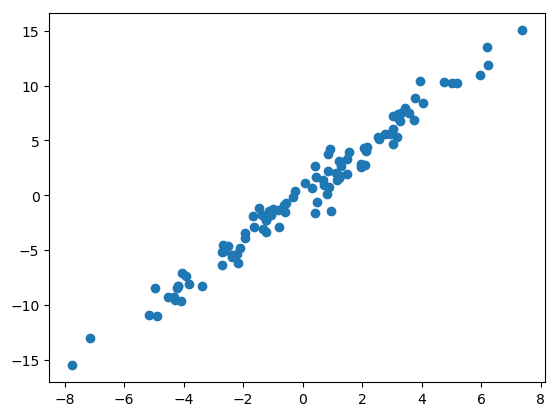

PyObject <matplotlib.collections.PathCollection object at 0x7f121dd622e8>

In [87]:
scatter(X, Y)

In [88]:
F = eigen(transpose(M) * M)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
   19.492075332161903
 4902.714719791295   
eigenvectors:
2×2 Array{Float64,2}:
 -0.900344  0.435179
  0.435179  0.900344

Optimal d given by the eigenvector corresponding to the bigger eigenvalue (2)

In [89]:
F.values

2-element Array{Float64,1}:
   19.492075332161903
 4902.714719791295   

encoding function is: $D^\top x$

In [90]:
M_new = transpose(transpose(F.vectors)* transpose(M))

100×2 Transpose{Float64,Array{Float64,2}}:
  0.403848    -1.76366 
 -0.308314   -10.5009  
  1.01071      4.22538 
  0.0191804    7.54242 
 -0.698037    -0.343871
 -0.5467      -2.97656 
  0.146299    -9.28312 
  0.892518     3.78148 
  0.197659     2.36271 
 -0.30777     -6.11519 
 -0.373014     2.09342 
  0.291195    14.8515  
  0.316274     4.26334 
  ⋮                    
  0.0599585   -4.31854 
  0.344546     8.64473 
 -0.235322    -5.91253 
  0.790684     2.62484 
 -0.131998     2.31644 
 -0.208288     6.3148  
  0.409045     1.05225 
  0.317729     8.22431 
  0.0190714    2.98167 
  0.326457     8.04899 
 -0.0475335   11.4353  
 -0.164162    -3.37891 

Showing transformed data have more variance on y axis

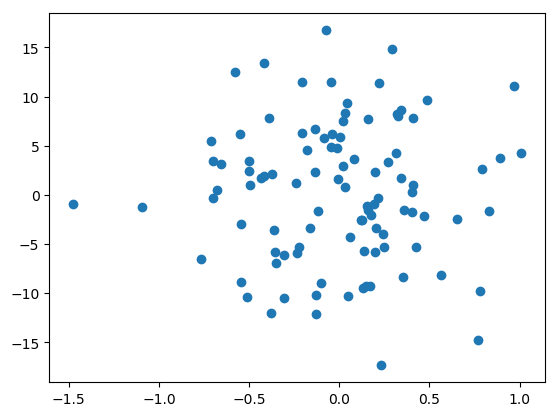

PyObject <matplotlib.collections.PathCollection object at 0x7f121dcc7390>

In [91]:
scatter(M_new[1:100], M_new[101:200])